# 개요
+ matplotlib를 이용한 기본적인 시각화
+ Line Chart, Bar Chart, Scatter Plot

# matplotlib - 그래프 그리기
+ 각종 데이터 그래프 그리는 도구
  - line, bar(수직/수평), area, scatter, pie 등
  - 다양한 chart option

## 일단 그려보기 - Line Chart
+ 연도별 GDP 데이터
    - x축: 연도
    - y축: GDP

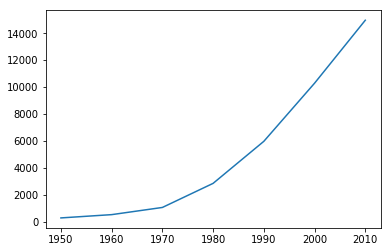

In [25]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp)

### 시각화 튜닝하기 - plot options
+ 어떤 옵션들이 있는가?
  - help() 

In [7]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of programmatic
    plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, hold=None, data=None, **kwargs)
        Plot the autocorrelation of `x`.
        
        Parameters
        ----------
        
        x : sequence of scalar
        
        hold : boolean, optional, *deprecated*, default: True
        
        detrend : callable, optional, default: `mlab.detrend_none`
            x is detrended by the `detrend` callable. Default is no
            normalization.
        
        normed : boolean

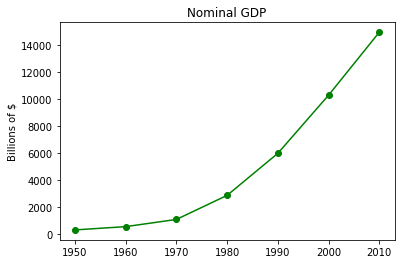

In [33]:
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")

plt.show()

# Bar 차트
+ 영화, 오스카상 수상수

In [35]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

### 대충 그리면...
+ 라인 차트는 주어진 데이터를 잘 표현하는가?

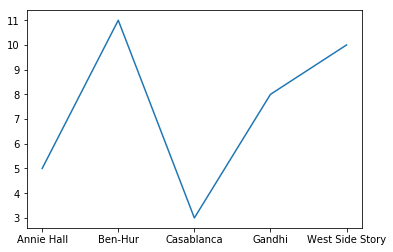

In [44]:
plt.plot(movies, num_oscars)

### 제대로 그리기
+ line &rarr; bar
+ xticks()
  - X축 레이블 맞추기

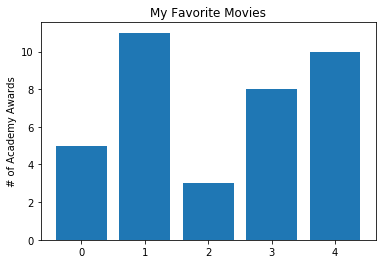

In [50]:
# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)

# 원본의 텍스트를 그대로 출력 (45도 기울이는게 좋을듯)
#plt.bar(movies, num_oscars)
#plt.xticks(rotation=45)

plt.title("My Favorite Movies")     # add a title
plt.ylabel("# of Academy Awards")   # label the y-axis

# label x-axis with movie names at bar centers
#plt.xticks(range(len(movies)), movies)

plt.show()

# 히스토그램
+ 성적(Grade) 데이터
+ 성적 구간별 득점자수를 히스토그램으로 시각화
  - x축: 성적구간 (0점대, 10점대, 20점대, ...)
  - y축: 구간의 득점자수

In [53]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

### 데이터 전처리/변환
+ 원시 데이터 &rarr; 구간 데이터
+ 구간에 맞게 Bar chart를 그리도록 x축 위치 조정

In [61]:
# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

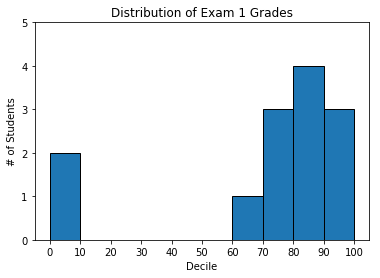

In [64]:
plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

## 왜곡된 시각화 - 같은 데이터, 다른 시각화
+ 시각화의 장단점
  - 장) 분포, 양, 추이를 빠르게 파악
  - 단) 데이터를 잘못 이해할 수 있다 (보이는게 전부가 아님)

### 큰 차이?

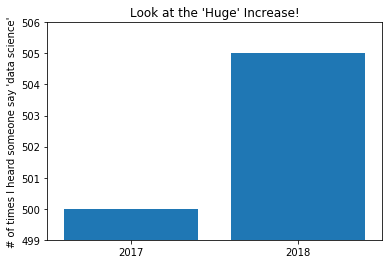

In [68]:

mentions = [500, 505]
years = [2017, 2018]
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

### 작은 차이!
+ y축의 범위를 제대로

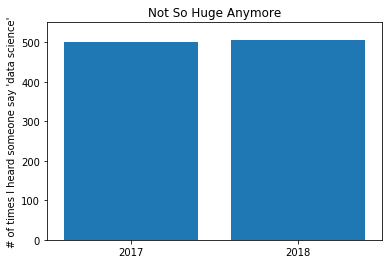

In [69]:
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset=False)

plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")
plt.show()

# Line Charts
+ 여러 데이터 셋 비교
+ 데이터 셋 구분 (컬러, 레이블, 스타일 등)
+ 범례 보여주기

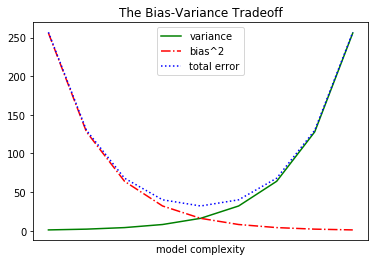

In [71]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

# Scatterplots
+ 두 데이터 셋의 분포와 상관관계 시각화

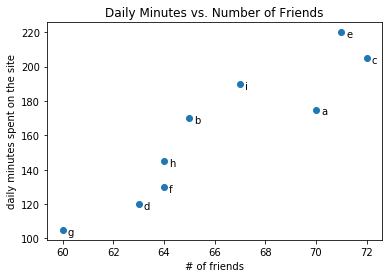

In [73]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

## 옳바른 비교 - 주의사항

### 원본 데이터를 그대로 찍어보기
+ 약간의 문제가 있다

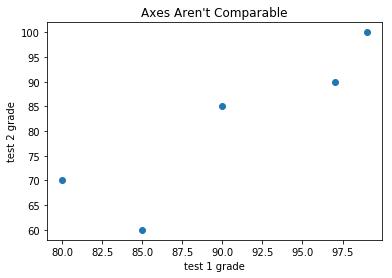

In [83]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

### 축(axis)을 같게
+ 분포가 다른 두 데이터 셋을 비교할 때 주의!

Text(0,0.5,'test 2 grade')

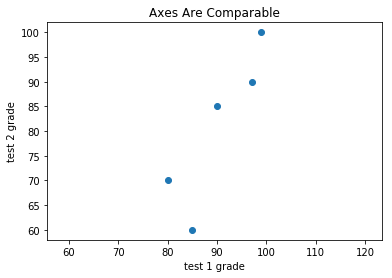

In [84]:
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.axis("equal")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")

# 참고 - Boxplot
+ 데이터의 분포와 특징을 한 번에 시각화
+ 평균, 중간값, 분위값 범위, 이상치(Outlier)

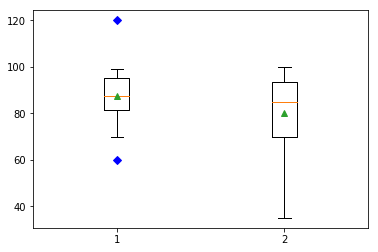

In [78]:
# Boxplot
test_1_grades = [85, 60, 90, 70, 99, 90, 85, 97, 80, 120]
test_2_grades = [35, 100, 85, 60, 90, 70, 70, 99, 90, 85, 97]
plt.boxplot([test_1_grades, test_2_grades],  0, 'bD', showmeans=True)
plt.show()

## Boxplot - Options

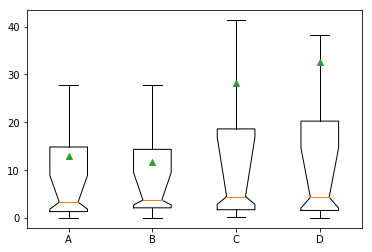

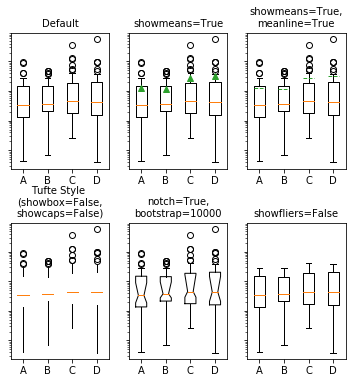

In [79]:
import numpy as np
#import matplotlib.pyplot as plt

# fake data
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
#data = np.random.normal(size=(37, 4), loc=1.5, scale=1.75)
labels = list('ABCD')
fs = 10  # fontsize


plt.boxplot(data, labels=labels, showmeans=True, showfliers=False, notch=True, bootstrap=10000)
plt.show()


# demonstrate how to toggle the display of different elements:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axes[0, 0].boxplot(data, labels=labels)
axes[0, 0].set_title('Default', fontsize=fs)

axes[0, 1].boxplot(data, labels=labels, showmeans=True)
axes[0, 1].set_title('showmeans=True', fontsize=fs)

axes[0, 2].boxplot(data, labels=labels, showmeans=True, meanline=True)
axes[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axes[1, 0].boxplot(data, labels=labels, showbox=False, showcaps=False)
tufte_title = 'Tufte Style \n(showbox=False,\nshowcaps=False)'
axes[1, 0].set_title(tufte_title, fontsize=fs)

axes[1, 1].boxplot(data, labels=labels, notch=True, bootstrap=10000)
axes[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

axes[1, 2].boxplot(data, labels=labels, showfliers=False)
axes[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=.4)
plt.show()

# 참고 - 3D 시각화

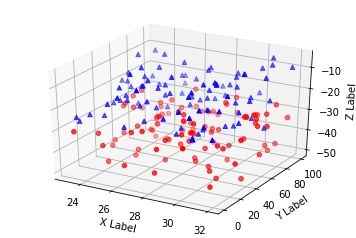

In [80]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# 참고 - Word Cloud

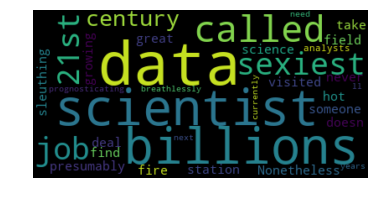

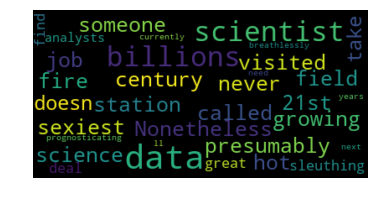

In [81]:
from wordcloud import WordCloud


# Read the whole text.
text = '''Data scientist has been called “the sexiest job of the 21st century,” presumably by
someone who has never visited a fire station. Nonetheless, data science is a hot and
growing field, and it doesn’t take a great deal of sleuthing to find analysts breathlessly
prognosticating that over the next 10 years, we’ll need billions and billions more data
scientists than we currently have.'''

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()